# Debate Results Analysis

Comparing accuracy across three conditions:
1. **Debater Direct**: Debater LLM answers directly
2. **Judge Direct**: Judge LLM answers directly
3. **Debate**


In [34]:
import json
import pandas as pd

In [67]:
# results_file =  'parallel_debate_runs/run_20251017_171633/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_090651/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_093933/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_120358/master_results.jsonl'
# results_file = 'parallel_debate_runs/run_20251020_121119/master_results.jsonl'
results_file = 'parallel_debate_runs/run_20251020_131736/master_results.jsonl'

results_df = pd.json_normalize(pd.read_json(results_file, lines=True).to_dict('records'))


In [68]:
results_df.head()

run_id                  timestamp  question.question_idx  \
0  575a7e18 1970-08-23 09:17:00.131830                     28   
1  ac204570 1970-08-23 09:17:00.131917                      1   
2  b56885aa 1970-08-23 09:17:00.131919                     20   
3  0e7ef24f 1970-08-23 09:17:00.131921                    183   
4  5d940fd4 1970-08-23 09:17:00.131922                     50   

  question.choices_selected  \
0                    [0, 1]   
1                    [0, 1]   
2                    [3, 0]   
3                    [3, 0]   
4                    [0, 2]   

                              question.choice_values question.is_correct  \
0                               [Mutant 2, Mutant 3]       [True, False]   
1                                           [11, 10]       [True, False]   
2  [A = cyclohexane-1,3,5-trione, B = dimethyl fu...       [False, True]   
3  [i) tert-butyl chloride/AlCl3 ; ii) HNO3/H2SO4...       [False, True]   
4  [U=- (1/2) *kq^2 R/(d^2 -R^2), U=- kq^2 d/(d^2...       [True, False]   

  question.dataset_name question.dataset_subset question.dataset_split  \
0       Idavidrein/gpqa            gpqa_diamond                  train   
1       Idavidrein/gpqa            gpqa_diamond                  train   
2       Idavidrein/gpqa            gpqa_diamond                  train   
3       Idavidrein/gpqa            gpqa_diamond                  train   
4       Idavidrein/gpqa            gpqa_diamond                  train   

   debater_direct.correct  debater_direct.confidence  debater_direct.cached  \
0                    True                         85                  False   
1                    True                         90                  False   
2                   False                         90                  False   
3                   False                         85                  False   
4                   False                         90                  False   

   judge_direct.correct  judge_direct.confidence  judge_direct.cached  \
0                  True                       85                False   
1                  True                       90                False   
2                 False                       85                False   
3                 False                       85                False   
4                 False                       90                False   

   modes.non_interactive.turns modes.non_interactive.winner  \
0                            5                            A   
1                            2                            B   
2                            3                            A   
3                            4                            B   
4                            4                            B   

   modes.non_interactive.correct  modes.non_interactive.confidence  
0                           True                                75  
1                          False                                85  
2                          False                                85  
3                           True                                85  
4                          False                                85

In [69]:
correct_cols = results_df.filter(like='correct').drop(columns='question.is_correct')
accuracies = pd.DataFrame({
    'accuracy': correct_cols.mean(),
    'total_count': correct_cols.count()
})
accuracies

accuracy  total_count
debater_direct.correct             0.53          100
judge_direct.correct               0.58          100
modes.non_interactive.correct      0.59          100

<Axes: >

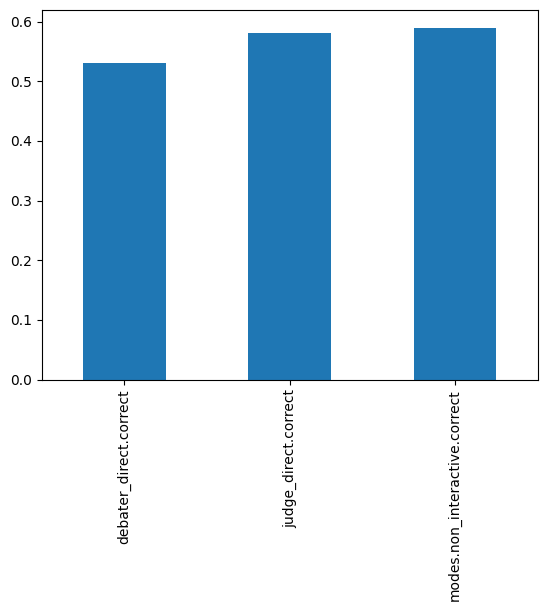

In [70]:
accuracies['accuracy'].plot.bar()